# Pipeline on the preprocessed generic model (after synonyms,..)

In [2]:
import pandas as pd
import numpy as np
import maboss
import shutil
import os
import seaborn as sns
import matplotlib.pyplot as plt
from functions.generate_utils.create_generic_models.update_phenotypes_generic_models import generic_models_update_phenotypes
from functions.analysis_utils.MaBoSS_simulation.maboss_phenotype_patient import compute_phenotype_table_generic

from functions.generate_utils.create_generic_models.update_nodes_names import replace_node_names_in_file


In [3]:

name_montagud_maps = {
        "CASPASE8": "CASP8",
        "CASPASE3": "CASP3",
        "CASPASE9": "CASP9",
        "CYCLINB": "CCNB1",
        "CYCLIND": "CCND1",
        "DSH": "DVL1",
        "BETA_CATENIN": "CTNNB1",
        "E_CADHERIN": "CDH1",
        "CYCC": "CYCS",
        "MEK1_2": "MEK1",
        "NF_KB": "NFKB",
        "SNAIL": "SNAI1",
        "TNFALPHA": "TNF",
        "TSC1_2": "TSC1",
        "BCL_XL": "BCL2L1",
        "MAP3K1_3": "MAP3K1",
        "CHK1_2": "CHK1",
    }

In [4]:
# chose folder where we want all the personalized boolean models and associated results saved 
drug_interest = 'Refametinib' #Pictilisib, 'Avagacestat' AZD8931 
tissue_interest = 'Prostate'
tissue_remove = 'Haematopoietic and Lymphoid'

data_model_folder = 'data/montagud_models'
bnd_original_model = f'{data_model_folder}/Montagud2022_Prostate_Cancer.bnd'
cfg_original_model = f'{data_model_folder}/Montagud2022_Prostate_Cancer.cfg'



In [5]:
folder_model = "analysis/generic_models"
folder_result = f"{folder_model}/results"

# os.makedirs(folder_model, exist_ok=True)
# os.makedirs(folder_result, exist_ok=True)


# shutil.copy(bnd_original_model, f"{folder_model}/Montagud2022_{tissue_interest}_Cancer.bnd")
# shutil.copy(cfg_original_model, f"{folder_model}/Montagud2022_{tissue_interest}_Cancer.cfg")


In [6]:

input_nodes = ['ACIDOSIS', 'ANDROGEN', 'CARCINOGEN', 'EGF', 'FGF', 'HYPOXIA', 'NUTRIENTS', 'SPOP', 'TGFB', 'TNF']

phenotypes_interest = [
        "PROLIFERATION",
        "INVASION",
        "DNA_REPAIR",
        "MIGRATION",
        "APOPTOSIS",
    ]

nodes_to_remove = ['FUSED_EVENT', 'AR_ERG']

In [7]:
# pre process the models
cfg_template_path = (
        folder_model + "/Montagud2022_Prostate_Cancer.cfg"
    )
bnd_template_path = (
    folder_model + "/Montagud2022_Prostate_Cancer.bnd"
)
cfg_template_path

'analysis/generic_models/Montagud2022_Prostate_Cancer.cfg'

In [8]:
# pre process the models
cfg_template_path = (
        folder_model + "/Montagud2022_Prostate_Cancer.cfg"
    )
bnd_template_path = (
    folder_model + "/Montagud2022_Prostate_Cancer.bnd"
)



nodes_to_add = {"MEK1": "MEK2", "TSC1": "TSC2", "MAP3K1": "MAP3K3", "CHK1": "CHK2"}


# # # --- Pre process the generic model (proteins or genes names) ---
# replace_node_names_in_file(cfg_template_path, name_montagud_maps, nodes_to_remove, nodes_to_add)
# replace_node_names_in_file(bnd_template_path, name_montagud_maps, nodes_to_remove, nodes_to_add)

In [9]:
# update phenotypes 
generic_models_update_phenotypes(phenotypes_interest, folder_model)

Modified and saved: analysis/generic_models/Montagud2022_Prostate_Cancer.cfg


In [10]:
results_phenotypes = compute_phenotype_table_generic(folder_model,input_nodes,phenotypes_interest, folder_result)


Results:
- Generic models show overal less proliferation than the sensitive and resistant groups.
- no stats test possible as only one model

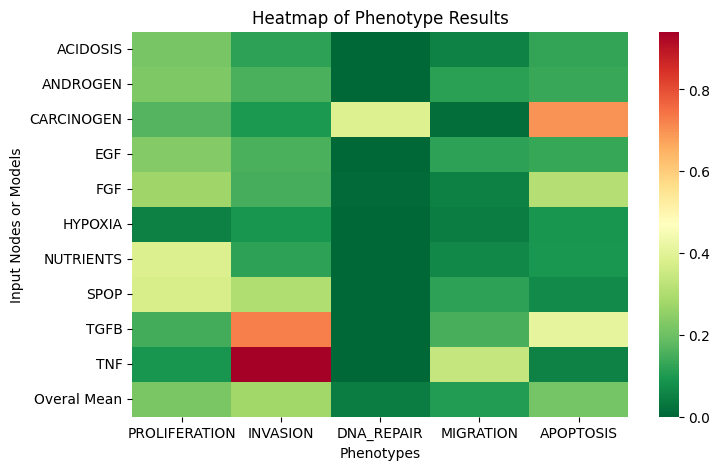

In [11]:


plt.figure(figsize=(8, 5))
results_phenotypes_numeric = results_phenotypes.apply(pd.to_numeric, errors='coerce')
sns.heatmap(results_phenotypes_numeric, annot=False, cmap="RdYlGn_r")
plt.title("Heatmap of Phenotype Results")
plt.xlabel("Phenotypes")
plt.ylabel("Input Nodes or Models")

# Save as high-resolution PDF
plt.savefig("analysis/generic_models/results/heatmap_phenotypes.png", dpi=400, bbox_inches='tight')  

plt.show()



In [11]:
bnd_template_path

'analysis/generic_models/Montagud2022_Prostate_Cancer.bnd'

In [12]:
cfg_template_path

'analysis/generic_models/Montagud2022_Prostate_Cancer.cfg'

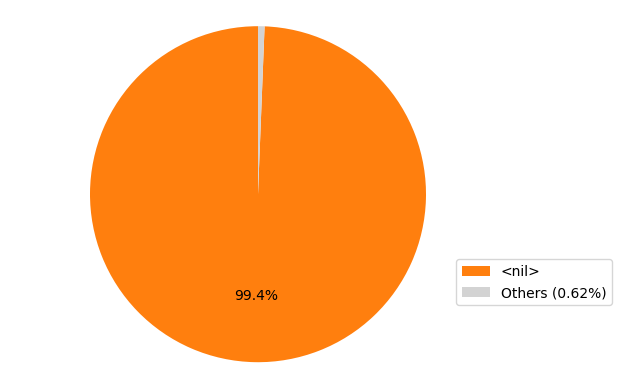

In [18]:
model_generic_zero = maboss.load(bnd_template_path,cfg_template_path)
# generic_model = model_generic.run()


for node in input_nodes:
    model_generic_zero.network.set_istate(node, [1, 0])

generic_model_zero = model_generic_zero.run()
generic_model_zero.plot_piechart()

fig = plt.gcf()

fig.savefig("analysis/generic_models/results/piechart_generic_model_zero.pdf", format='pdf', dpi=400, bbox_inches='tight')


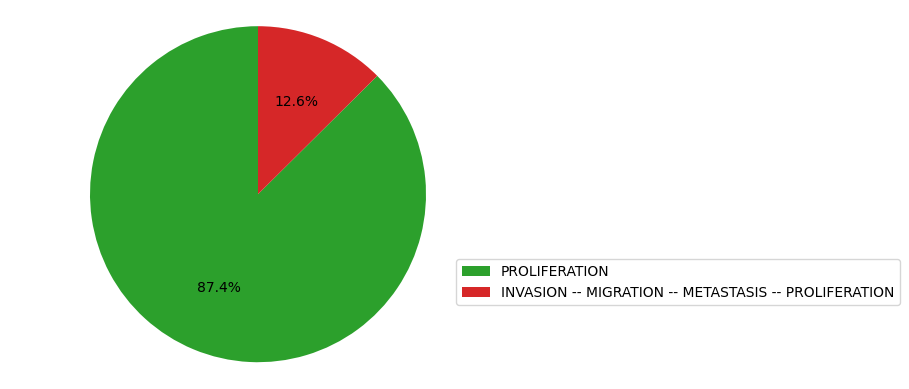

In [19]:
model_generic_zero_egf_nutrients = model_generic_zero.copy()

model_generic_zero_egf_nutrients.network.set_istate('EGF', [0, 1])
model_generic_zero_egf_nutrients.network.set_istate('NUTRIENTS', [0, 1])
generic_model_egf_nutrients = model_generic_zero_egf_nutrients.run()

generic_model_egf_nutrients.plot_piechart()

fig = plt.gcf()


fig.savefig("analysis/generic_models/results/piechart_generic_egf_nutrients.pdf", format='pdf', dpi=400, bbox_inches='tight')


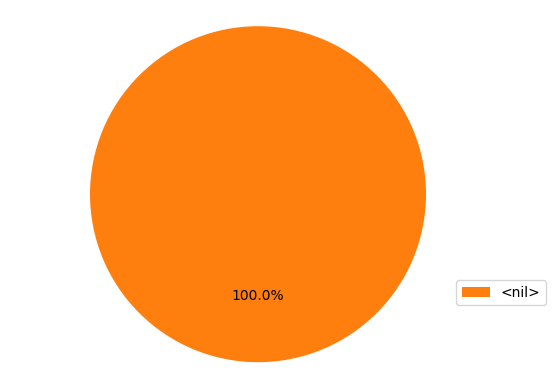

In [20]:
model_generic_zero_egf_nutrients_myc_mut = model_generic_zero_egf_nutrients.copy()
model_generic_zero_egf_nutrients_myc_mut.mutate("MYC_MAX", "OFF")
res_mutant_generic_growth_myc_mut = model_generic_zero_egf_nutrients_myc_mut.run()
res_mutant_generic_growth_myc_mut.plot_piechart()

fig = plt.gcf()

fig.savefig("analysis/generic_models/results/piechart_generic_growth_myc_mut.pdf", format='pdf', dpi=400, bbox_inches='tight')



Results

- similar results as the paper
- TGFB can act as both an oncogene and tumor suppressor
- When Carcinogen is present this increase genome instability and DNA damage (DNA repair is a sensor of DNA damage)